In [398]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA

from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, GRU
from tensorflow.keras.utils import timeseries_dataset_from_array

from keras.preprocessing import sequence
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

from keras.optimizers import Adam
from keras.models import load_model
from keras.callbacks import ModelCheckpoint

In [3]:
pd.set_option('display.max_columns', 100)

In [17]:
data = pd.read_pickle('../data/full_data.pkl')
data.head()

,Adj Close,pct_change_adj_close,lag_pct_change_adj_close,lag_pct_change_volume,lag_ma5_pct_change_adj_close,topic 1,topic 2,topic 3,topic 4,topic 5,topic 6,sentiment_mc,sentiment_zstc,ffr,unemployment_rate,median_cpi,retail_sales,10_year_treasury_yeild,10year_3month_yield_spread,vix,us_china_exchange_rate,us_japan_exchange_rate,inflation,growth,Three_Component_Index,News_Based_Policy_Uncert_Index,price_increase
1993-04-01,450.299988,-0.303324,-0.066373,20.762144,0.161433,0.019203,0.071071,0.389098,0.092606,0.405476,0.022546,1.11151,0.402003,3.31,7.1,4.09652,176749.0,5.97,3.10,13.02,5.7333,114.1,0.348918,0.582113,109.256836,89.651123,0
1993-04-02,441.390015,-1.978675,-0.303324,-15.996275,-0.024659,0.019203,0.071071,0.389098,0.092606,0.405476,0.022546,1.11151,0.402003,3.13,7.1,4.09652,176749.0,5.97,3.19,14.50,5.7333,114.2,0.348918,0.582113,109.256836,89.651123,0
1993-04-05,442.290009,0.203900,-1.978675,37.862960,-0.282885,0.019203,0.071071,0.389098,0.092606,0.405476,0.022546,1.11151,0.402003,3.15,7.1,4.09652,176749.0,5.97,3.16,14.12,5.7333,113.6,0.348918,0.582113,109.256836,89.651123,1
1993-04-06,441.160004,-0.255490,0.203900,-8.427922,-0.375652,0.019203,0.071071,0.389098,0.092606,0.405476,0.022546,1.11151,0.402003,2.97,7.1,4.09652,176749.0,5.97,3.10,14.24,5.7333,114.0,0.348918,0.582113,109.256836,89.651123,0
1993-04-07,442.730011,0.355882,-0.255490,-0.810592,-0.479992,0.019203,0.071071,0.389098,0.092606,0.405476,0.022546,1.11151,0.402003,2.93,7.1,4.09652,176749.0,5.97,3.09,13.64,5.7333,113.7,0.348918,0.582113,109.256836,89.651123,1


In [192]:
X = data.drop(columns=['price_increase', 'Adj Close', 'pct_change_adj_close', 'price_increase'])
y = data['price_increase']

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=0.05)

In [11]:
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)


# Confirm.
X_train.head(3)

,const,lag_pct_change_adj_close,lag_pct_change_volume,lag_ma5_pct_change_adj_close,topic 1,topic 2,topic 3,topic 4,topic 5,topic 6,sentiment_mc,sentiment_zstc,ffr,unemployment_rate,median_cpi,retail_sales,10_year_treasury_yeild,10year_3month_yield_spread,vix,us_china_exchange_rate,us_japan_exchange_rate,inflation,growth,Three_Component_Index,News_Based_Policy_Uncert_Index
1993-04-01,1.0,-0.066373,20.762144,0.161433,0.019203,0.071071,0.389098,0.092606,0.405476,0.022546,1.11151,0.402003,3.31,7.1,4.09652,176749.0,5.97,3.10,13.02,5.7333,114.1,0.348918,0.582113,109.256836,89.651123
1993-04-02,1.0,-0.303324,-15.996275,-0.024659,0.019203,0.071071,0.389098,0.092606,0.405476,0.022546,1.11151,0.402003,3.13,7.1,4.09652,176749.0,5.97,3.19,14.50,5.7333,114.2,0.348918,0.582113,109.256836,89.651123
1993-04-05,1.0,-1.978675,37.862960,-0.282885,0.019203,0.071071,0.389098,0.092606,0.405476,0.022546,1.11151,0.402003,3.15,7.1,4.09652,176749.0,5.97,3.16,14.12,5.7333,113.6,0.348918,0.582113,109.256836,89.651123


In [12]:
lm = sm.OLS(y_train, X_train)
lm_results = lm.fit()
print(lm_results.summary())

                            OLS Regression Results                            
Dep. Variable:         price_increase   R-squared:                       0.027
Model:                            OLS   Adj. R-squared:                  0.024
Method:                 Least Squares   F-statistic:                     8.378
Date:                Fri, 28 Jul 2023   Prob (F-statistic):           1.93e-29
Time:                        09:52:05   Log-Likelihood:                -5140.0
No. Observations:                7253   AIC:                         1.033e+04
Df Residuals:                    7228   BIC:                         1.050e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [397]:
# lm_results.predict(X_test).values

In [14]:
r2_score(y_test, lm_results.predict(X_test).values)

0.039831626524980956

In [15]:
mean_squared_error(y_test, lm_results.predict(X_test).values) ** 0.5

0.4892689457562705

### RNN:


In [399]:
data.head()

,Adj Close,pct_change_adj_close,lag_pct_change_adj_close,lag_pct_change_volume,lag_ma5_pct_change_adj_close,topic 1,topic 2,topic 3,topic 4,topic 5,topic 6,sentiment_mc,sentiment_zstc,ffr,unemployment_rate,median_cpi,retail_sales,10_year_treasury_yeild,10year_3month_yield_spread,vix,us_china_exchange_rate,us_japan_exchange_rate,inflation,growth,Three_Component_Index,News_Based_Policy_Uncert_Index,price_increase
1993-04-01,450.299988,-0.303324,-0.066373,20.762144,0.161433,0.019203,0.071071,0.389098,0.092606,0.405476,0.022546,1.11151,0.402003,3.31,7.1,4.09652,176749.0,5.97,3.10,13.02,5.7333,114.1,0.348918,0.582113,109.256836,89.651123,0
1993-04-02,441.390015,-1.978675,-0.303324,-15.996275,-0.024659,0.019203,0.071071,0.389098,0.092606,0.405476,0.022546,1.11151,0.402003,3.13,7.1,4.09652,176749.0,5.97,3.19,14.50,5.7333,114.2,0.348918,0.582113,109.256836,89.651123,0
1993-04-05,442.290009,0.203900,-1.978675,37.862960,-0.282885,0.019203,0.071071,0.389098,0.092606,0.405476,0.022546,1.11151,0.402003,3.15,7.1,4.09652,176749.0,5.97,3.16,14.12,5.7333,113.6,0.348918,0.582113,109.256836,89.651123,1
1993-04-06,441.160004,-0.255490,0.203900,-8.427922,-0.375652,0.019203,0.071071,0.389098,0.092606,0.405476,0.022546,1.11151,0.402003,2.97,7.1,4.09652,176749.0,5.97,3.10,14.24,5.7333,114.0,0.348918,0.582113,109.256836,89.651123,0
1993-04-07,442.730011,0.355882,-0.255490,-0.810592,-0.479992,0.019203,0.071071,0.389098,0.092606,0.405476,0.022546,1.11151,0.402003,2.93,7.1,4.09652,176749.0,5.97,3.09,13.64,5.7333,113.7,0.348918,0.582113,109.256836,89.651123,1


In [323]:
train, test = train_test_split(
    data.drop(columns=['Adj Close', 'pct_change_adj_close']), 
    shuffle=False, 
    test_size=0.1
)

In [400]:
mm = MinMaxScaler()
training_set_scaled = mm.fit_transform(train)

In [401]:
len(training_set_scaled)

6871

In [ ]:
# https://www.simplilearn.com/tutorials/deep-learning-tutorial/rnn

In [406]:
def rnn_data_structure(data, timesteps = 10):
    X = []
    y = []
    
    for i in range(timesteps-1, len(data)):
        X.append(data[i-timesteps+1:i+1, :-1])
        y.append(data[i, -1])
    X, y = np.array(X), np.array(y)
    
    return X, y
    

In [410]:
X_train, y_train = rnn_data_structure(training_set_scaled, )

0

In [407]:
a, b = rnn_data_structure(training_set_scaled)

In [376]:
X_test = []
y_test = []

for i in range(9, len(test_set_scaled)):
    X_test.append(test_set_scaled[i-9:i+1, :-1])
    y_test.append(test_set_scaled[i, -1])
X_test, y_test = np.array(X_test), np.array(y_test)

# X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test.shape 

(755, 10, 24)

In [368]:
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(10, 24)))
model.add(LSTM(64, return_sequences=True))
model.add(LSTM(64))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

In [369]:
model.compile(loss='bce', optimizer='rmsprop', metrics=['acc'])
es = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [378]:
# Fit
history = model.fit(
    X_train,
    y_train,
    validation_data= (X_test, y_test),
    epochs=20,
    batch_size = 64,
    callbacks = es
)

Epoch 1/20
108/108 [==============================] - 2s 17ms/step - loss: 0.6896 - acc: 0.5410 - val_loss: 0.6966 - val_acc: 0.5205
Epoch 2/20
108/108 [==============================] - 2s 16ms/step - loss: 0.6889 - acc: 0.5424 - val_loss: 0.6992 - val_acc: 0.5205
Epoch 3/20
108/108 [==============================] - 2s 17ms/step - loss: 0.6890 - acc: 0.5421 - val_loss: 0.7032 - val_acc: 0.5205
Epoch 4/20
108/108 [==============================] - 2s 16ms/step - loss: 0.6887 - acc: 0.5427 - val_loss: 0.6963 - val_acc: 0.5205
Epoch 5/20
108/108 [==============================] - 2s 16ms/step - loss: 0.6892 - acc: 0.5393 - val_loss: 0.6948 - val_acc: 0.5205
Epoch 6/20
108/108 [==============================] - 2s 17ms/step - loss: 0.6891 - acc: 0.5407 - val_loss: 0.7020 - val_acc: 0.5205
Epoch 7/20
108/108 [==============================] - 2s 16ms/step - loss: 0.6892 - acc: 0.5431 - val_loss: 0.6951 - val_acc: 0.5219
Epoch 8/20
108/108 [==============================] - 2s 17ms/step - 

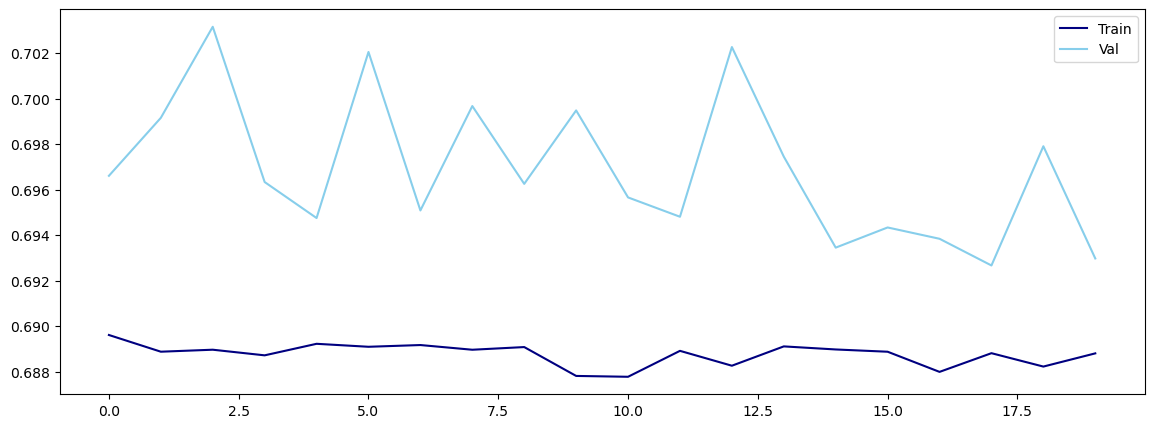

In [379]:
plt.figure(figsize=(14, 5))
plt.plot(history.history['loss'], c='navy', label='Train')
plt.plot(history.history['val_loss'], c='skyblue', label='Val')
plt.legend();

In [381]:
model.evaluate(X_test, y_test)

24/24 [==============================] - 0s 3ms/step - loss: 0.6930 - acc: 0.5205


[0.6929751634597778, 0.5205298066139221]

In [382]:
pred_test = model.predict(X_test)

24/24 [==============================] - 0s 3ms/step


In [389]:
threshold = 0.5 
y_pred = np.where(pred_test.reshape(-1) >= threshold, 1, 0)


In [393]:
len(y_test)

755

In [394]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[  0 362]
 [  0 393]]


              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       362
         1.0       0.52      1.00      0.68       393

    accuracy                           0.52       755
   macro avg       0.26      0.50      0.34       755
weighted avg       0.27      0.52      0.36       755



/Users/sdastan/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sdastan/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sdastan/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


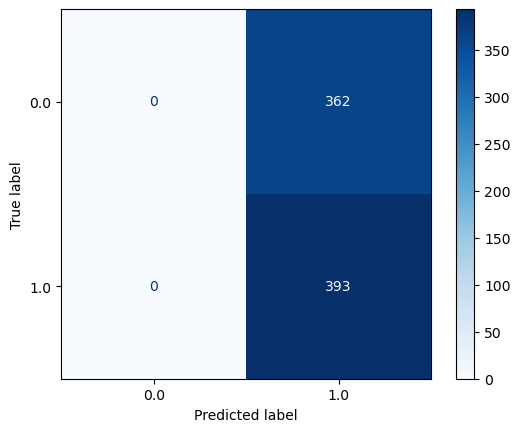

In [395]:
print(classification_report(y_test, y_pred_binary))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_binary, cmap='Blues');